In [1]:
# from sklearn.datasets import make_multilabel_classification
from torch.utils.data import Dataset
import json
import numpy as np
import torch
import time
from tqdm import tqdm
from NN_Models import *

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-10-11 14:58:35.640746: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X_train = torch.load('data/X_author_train.pt')
y_train = torch.load('data/y_train.pt')
# X_train = torch.load('data/X_author_all.pt')
# y_train = torch.load('data/y_all.pt')

X_test = torch.load('data/X_author_test.pt')
y_test = torch.load('data/y_test.pt')

In [3]:
num_samples, num_features = X_train.shape

print(X_train.shape)
print(X_test.shape)

torch.Size([6268, 21146])
torch.Size([3086, 21146])


In [4]:
count = 0
for i in y_test:
    if sum(i) == 0:
        count += 1
count / len(y_test)

0.1966947504860661

In [5]:
# train data loader
train_dataset, train_dataloader = BinaryDataLoader(X_train, y_train, shuffle=True, batch_size=100)

100%|██████████| 100/100 [54:08<00:00, 32.49s/it]


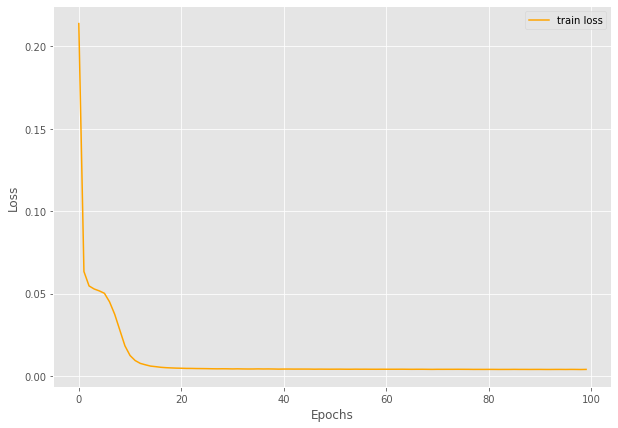

In [6]:
import torch.optim as optim

model = Model()

model.set_dim(num_features)

model.coauthor_model()

learning_rate = 0.001
optimizer = optim.Adam(params=model.coauthor_model().parameters(), lr=learning_rate) # 学习率衰减 / 学习率震荡
epochs = 100
model.train(train_dataloader, optimizer, epochs)

model.save_status("coauthor")
model.plot_loss()

### Test (ignore when submit kaggle)

In [7]:
from evaluation import evaluation

# print some info
print(f"[INFO]: Number of testing samples: {X_test.shape[0]}")
print(f"[INFO]: Number of testing features: {X_test.shape[1]}")

thresholds = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

f1_scores = evaluation(model.model, X_test, y_test, thresholds)

[INFO]: Number of testing samples: 3086
[INFO]: Number of testing features: 21146


100%|██████████| 9/9 [03:28<00:00, 23.15s/it]


In [8]:
print(thresholds[f1_scores.index(max(f1_scores))])
print(max(f1_scores))

# print(f1_scores[thresholds.index(0.5)])

0.4
0.6123094421627225


In [9]:
from preprocessing import for_kaggle
from evaluation import kaggle_predict

# X_kaggle = for_kaggle('year_venue')

kaggle_predict(model.model, X_train, 'author_train')
kaggle_predict(model.model, X_test, 'author_test')

100%|██████████| 3086/3086 [00:16<00:00, 192.19it/s]


# Kaggle Predictions

100%|██████████| 100/100 [1:24:26<00:00, 50.66s/it]


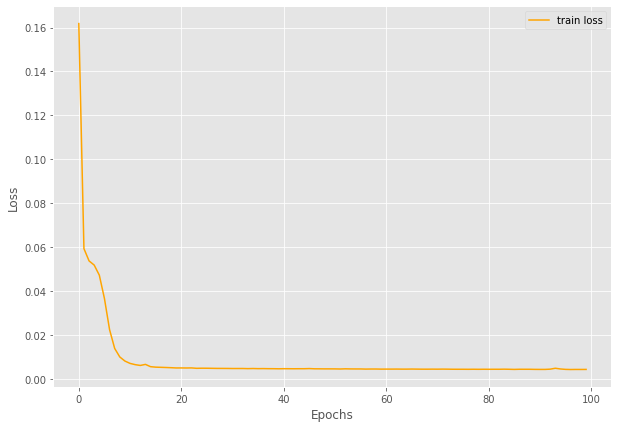

In [10]:
X_train = torch.load('data/X_author_all.pt')
y_train = torch.load('data/y_all.pt')
train_dataset, train_dataloader = BinaryDataLoader(X_train, y_train, shuffle=True, batch_size=100)

model = Model()
model.set_dim(num_features)
model.coauthor_model()

learning_rate = 0.001
optimizer = optim.Adam(params=model.coauthor_model().parameters(), lr=learning_rate) # 学习率衰减 / 学习率震荡
epochs = 100
model.train(train_dataloader, optimizer, epochs)

model.save_status("coauthor")
model.plot_loss()

In [11]:
from preprocessing import for_kaggle
from evaluation import kaggle_predict

X_kaggle = for_kaggle('coauthor')

# kaggle_predict(model.model, X_train, 'author_all')
kaggle_predict(model.model, X_kaggle, 'author')

100%|██████████| 800/800 [00:03<00:00, 238.35it/s]


In [12]:
12

12